In [1]:
%matplotlib inline
import pandas as pd

In [2]:
df = pd.read_csv('~/python-analysis/repositories3.csv', names=['author', 'file', 'lineNum', 'method', 'idiom', 'repository'])

In [3]:
# get a colum and calculate the number of each
authorRanking = df['author'].value_counts()

# get the more used idiom
idiomRanking = df['idiom'].value_counts()

# the repositories ranking
repoRanking = df['repository'].value_counts()

# line number
lineRanking = df['lineNum'].value_counts()

# file ranking
fileRanking = df['file'].value_counts()

# method ranking
methodRanking = df['method'].value_counts()

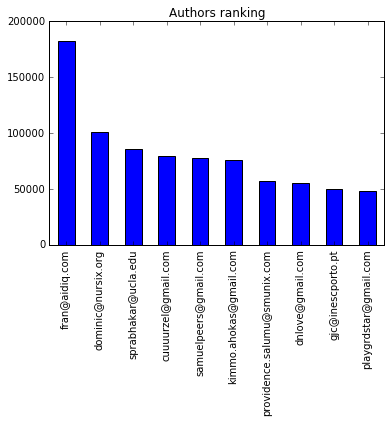

In [4]:
# best 10 authors
authorHist = authorRanking[:10].plot(kind='bar', title='Authors ranking')

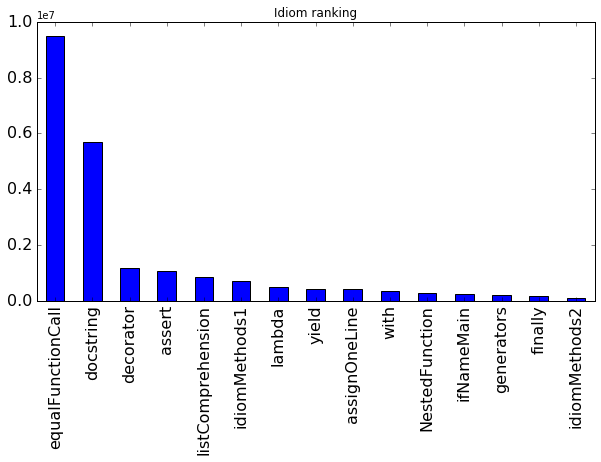

In [5]:
# idiom ranking
idiomRanking[:15].plot(kind='bar', figsize=(10, 5), title='Idiom ranking', fontsize=16)

In [6]:
# Filter equalFunctionCall to one per line found
eqFuncCallRows = df.loc[lambda df1: df1.idiom == 'equalFunctionCall', :]
print "Duplicated:", len(eqFuncCallRows)
eqFuncCallRows2 = eqFuncCallRows.drop_duplicates()
print "One / line:", len(eqFuncCallRows2)

Duplicated: 9494833
One / line: 7082581


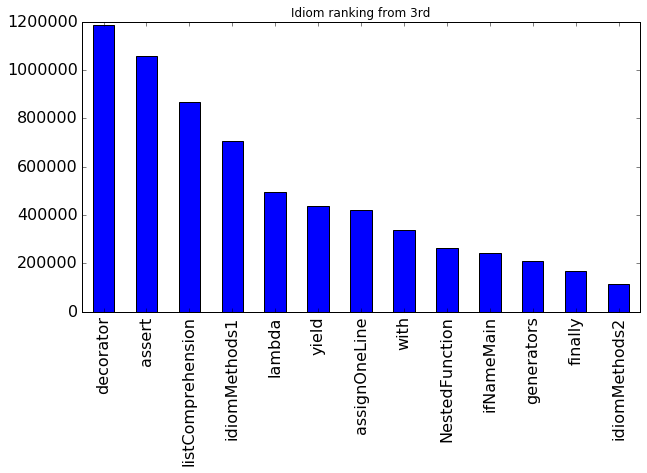

In [7]:
# Idiom ranking from third
idiomRanking[2:15].plot(kind='bar', figsize=(10, 5.2), title='Idiom ranking from 3rd', fontsize=16)

In [8]:
# How many files are documentated at least one time?
totalFiles = len(df['file'].unique())
docstringIdioms = df.loc[lambda df1: df1.idiom == 'docstring', :]
docFilesNum = len(docstringIdioms['file'].unique())
print float(docFilesNum)/float(totalFiles) *100, '%'

65.0671715359 %


{'listComprehension': 52.607820666908914, 'docstring': 75.44232328031975, 'yield': 21.849232747295748, 'assert': 25.081756435698914, 'equalFunctionCall': 85.3914526092182, 'decorator': 40.8991810380971, 'NestedFunction': 24.388573664644884, 'with': 31.764820974369005, 'idiomMethods2': 16.939653967632836, 'idiomMethods1': 38.11526958660592, 'lambda': 36.3948905721553}


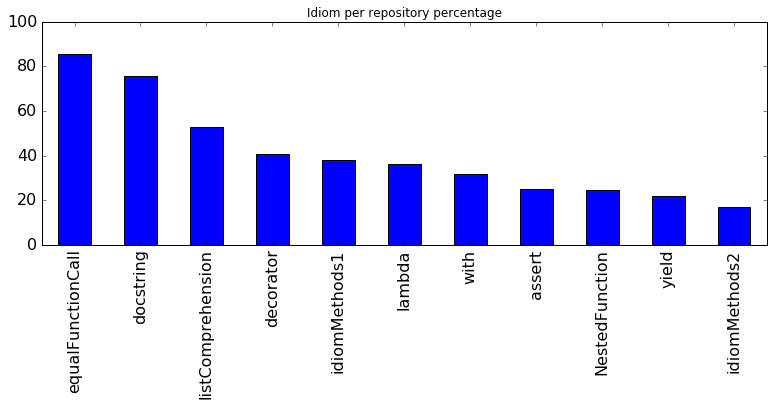

In [9]:
# Porcentages about some idioms in repositories
dictPercent = {}
totalRepos = len(df['repository'].unique())

def getPercent(idiom_name):
    idioms = df.loc[lambda df1: df1.idiom == idiom_name, :]
    number = len(idioms['repository'].unique())
    return float(number)/float(totalRepos) *100

""" ------------------------------------------------- """
# documentation
dictPercent['docstring'] = getPercent('docstring')
dictPercent['equalFunctionCall'] = getPercent('equalFunctionCall')
dictPercent['decorator'] = getPercent('decorator')
dictPercent['assert'] = getPercent('assert')
dictPercent['listComprehension'] = getPercent('listComprehension')
dictPercent['idiomMethods1'] = getPercent('idiomMethods1')
dictPercent['idiomMethods2'] = getPercent('idiomMethods2')
dictPercent['lambda'] = getPercent('lambda')
dictPercent['yield'] = getPercent('yield')
dictPercent['with'] = getPercent('with')
dictPercent['NestedFunction'] = getPercent('NestedFunction')

pd.Series(dictPercent).sort_values(ascending=False).plot(kind='bar', figsize=(13, 4), title='Idiom per repository percentage', fontsize=16, ylim=(0, 100))
print dictPercent

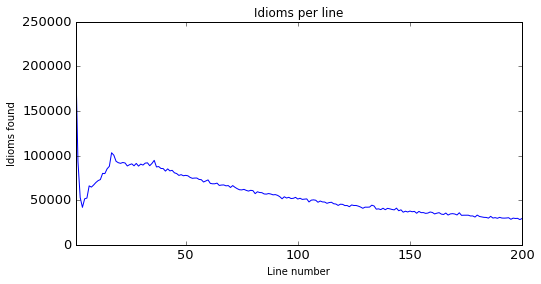

In [10]:
lineFig = lineRanking.sort_index()[:200].plot(figsize=(8, 4), title='Idioms per line', fontsize=13)
lineFig.set_xlabel('Line number')
lineFig.set_ylabel('Idioms found')

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fb27041ab10>], dtype=object)

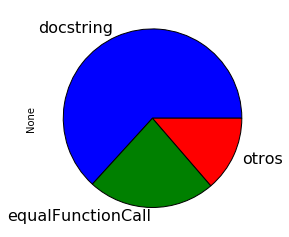

In [11]:
# Idioms in 10 first lines

df2 = df[df['lineNum'] <= 10]
idiomsPercent10 = df2['idiom'].value_counts(normalize=True)*100


#abbreviated
newIdiomsPercent = idiomsPercent10[:2].append(pd.Series({'otros': sum(idiomsPercent10[2:])}))
newIdiomsPercent.plot.pie(subplots=True,figsize=(4, 4), fontsize=16)
# This show that the files are documented and that's the reason that between lines 1-20 there aren't enough idioms

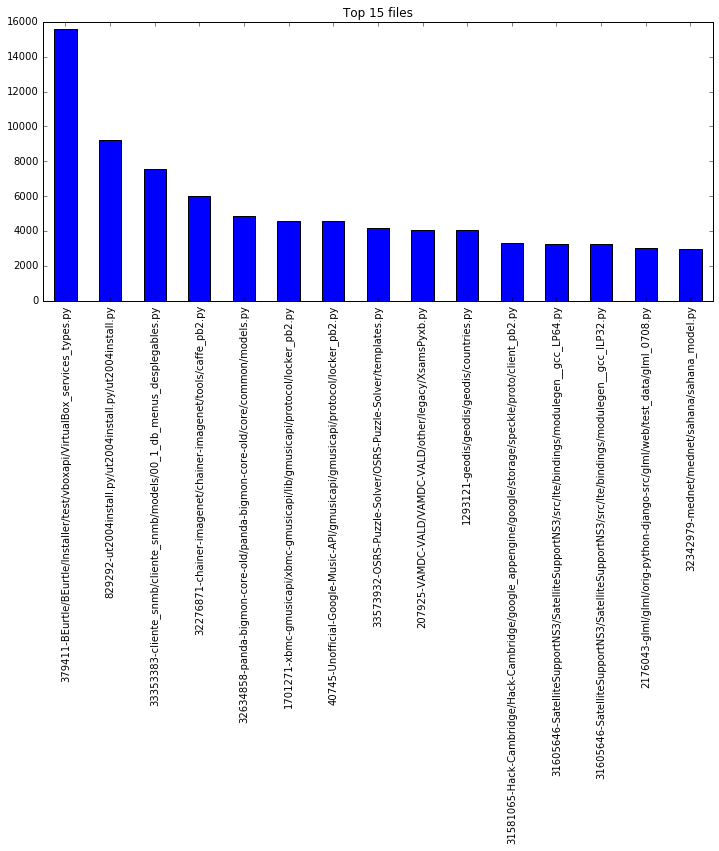

In [12]:
# top 10 files
fileHist = fileRanking[:15].plot(kind='bar', figsize=(12, 5), title='Top 15 files')

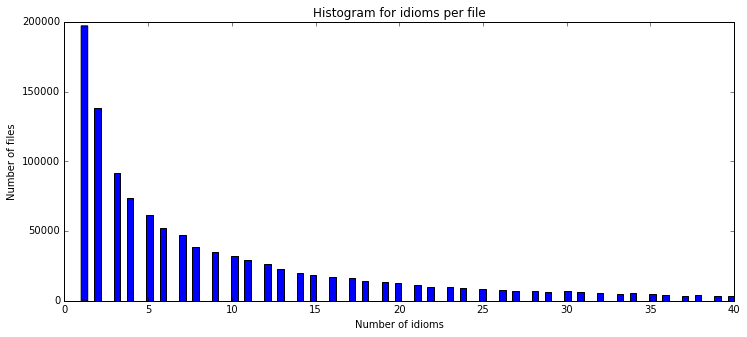

In [13]:
# Frecuencia de idioms por fichero
filesHist = fileRanking.plot(kind='hist', bins=100, range=(1,40), figsize=(12, 5), title='Histogram for idioms per file')
filesHist.set_xlabel('Number of idioms')
filesHist.set_ylabel('Number of files')

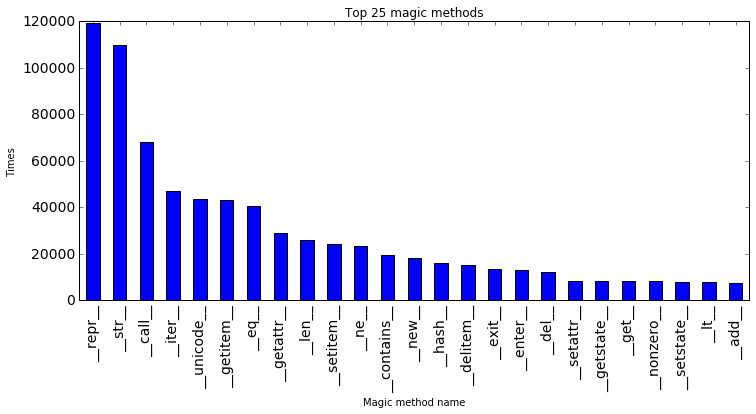

In [14]:
methodPlot = methodRanking[:25].plot(kind='bar', figsize=(12, 5), title='Top 25 magic methods', fontsize=14)
methodPlot.set_xlabel('Magic method name')
methodPlot.set_ylabel('Times')

242.10802512050427

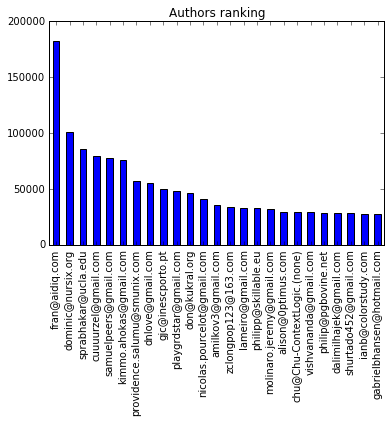

In [36]:
# Análisis de los autores
# best 10 authors
#authorRanking.hist(bins=100, range=(1,25))
df2 = df.loc[lambda df1: df1.idiom != 'equalFunctionCall', :]
df3 = df2.loc[lambda df1: df1.idiom != 'docstring', :]
#df2['author'].value_counts().hist(bins=100, range=(1,25))
#authorRanking
#mirar df.drop_duplicates()
df['author'].value_counts()[:25].plot(kind='bar', title='Authors ranking')
df['author'].value_counts().mean()
#authorRanking.count()

150.23364629435392

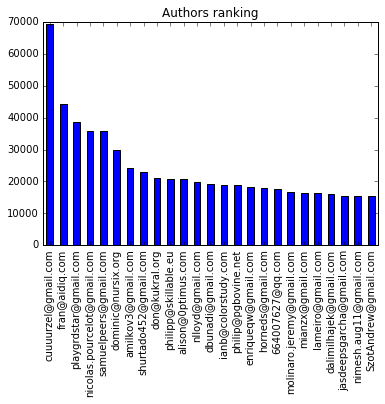

In [37]:
df2['author'].value_counts()[:25].plot(kind='bar', title='Authors ranking')
df2['author'].value_counts().mean()

88.77170889879663

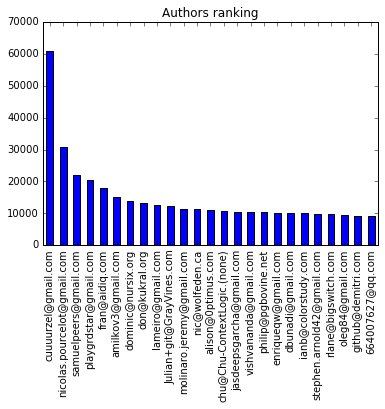

In [38]:
df3['author'].value_counts()[:25].plot(kind='bar', title='Authors ranking')
df3['author'].value_counts().mean()